In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import time
import datetime


In [2]:

df_labels=pd.read_csv('drug-label/drug_labels.csv')
df_recalls=pd.read_csv('drug-enforcement/drug_recalls.csv')


In [3]:
df_labels.head(100)

,Unnamed: 0,Unnamed: 0.1,abuse,accessories,active_ingredient,adverse_reactions,alarms,animal_pharmacology_and_or_toxicology,ask_doctor,ask_doctor_or_pharmacist,...,version,veterinary_indications,warnings,warnings_and_cautions,when_using,date,month,year,NDCs,unq_ndc
0,0,0,0,0,NaN,[u'6 ADVERSE REACTIONS Adults: Most common adv...,0,1,0,0,...,1,0,NaN,1,0,3,7,2013,"[663360722, 66336072230, 663360706]",66336-706
1,1,1,0,0,NaN,[u'6 ADVERSE REACTIONS Most common adverse rea...,0,0,0,0,...,1,0,NaN,1,0,2,7,2013,"[55045143304, 55045143304]",55045-1433
2,2,2,0,0,NaN,"[u'ADVERSE REACTIONS (listed alphabetically, u...",0,0,0,0,...,1,0,"[u""WARNINGS General Rare instances of anaphyla...",0,0,2,7,2013,"[5456903220, 5456903361, 5456903244]",54569-0322
3,3,3,0,0,[u'adenosine'],NaN,0,0,0,0,...,1,0,[u'\u25a0 discontinue use if the following abn...,0,0,11,7,2013,[],59220-4001
4,4,4,0,0,NaN,"[u'ADVERSE REACTIONS: In general, the adverse ...",0,0,0,0,...,11,0,[u'WARNINGS: Sinus Node Disease and AV Block: ...,0,0,8,7,2013,[],0615-0547
5,5,5,0,0,NaN,"[u""ADVERSE REACTIONS Adverse reactions reporte...",0,0,0,0,...,1,0,"[u""WARNINGS CARDIOVASCULAR EFFECTS Cardiovascu...",0,0,8,7,2013,"[663360815, 66336081530, 66336081560, 663360815]",66336-815
6,6,6,0,0,[u'Active Ingredient Dimethicone 1%'],NaN,0,0,0,0,...,1,0,[u'Warnings For external use only When Using T...,0,1,3,7,2013,[5095200911],50952-009
7,7,7,0,0,NaN,"[u'ADVERSE REACTIONS Severe itching, erythema,...",0,0,0,0,...,15,0,[u'WARNINGS Because of the benzyl alcohol cont...,0,0,10,6,2013,[],11994-121
8,8,8,0,0,"[u'Active Ingredient Hydroquinone USP, 4% (40 ...",NaN,0,0,0,0,...,1,0,[u'Warnings Avoid getting into eyes. For exter...,0,1,12,8,2013,[],62032-524
9,9,9,0,0,[u'Active ingredients Purpose Octinoxate 7.5% ...,NaN,0,0,0,0,...,1,0,[u'Warnings Avoid getting into eyes. For exter...,0,1,12,8,2013,[0],62032-523


In [4]:
print len(df_labels)
print df_labels['unq_ndc'].isnull().sum()


105446
18304


In [5]:
df_labels_ndc=df_labels[df_labels['unq_ndc'].isnull()==False].copy()

In [6]:
print len(df_labels_ndc)
print df_labels_ndc['unq_ndc'].isnull().sum()

87142
0


In [7]:
def get_ndc_company(value):
    #value=str(value)
    value_split=value.split('-')
    company=value_split[0]
    return company

def get_ndc_product(value):
    #value=str(value)
    value_split=value.split('-')
    product=value_split[1]
    return product

In [8]:
df_labels_ndc['company']=df_labels_ndc['unq_ndc'].apply(get_ndc_company)
df_labels_ndc['product']=df_labels_ndc['unq_ndc'].apply(get_ndc_product)

In [9]:
df_labels_ndc['company'].head()

0    66336
1    55045
2    54569
3    59220
4     0615
Name: company, dtype: object

In [10]:
df_labels_ndc['product'].head()

0     706
1    1433
2    0322
3    4001
4    0547
Name: product, dtype: object

In [11]:
print df_labels_ndc['company'].count()
print df_labels_ndc['company'].nunique()

87142
5183


In [12]:
print df_labels_ndc['product'].count()
print df_labels_ndc['product'].nunique()

87142
9422


In [13]:
print len(df_recalls)
print df_recalls['unq_ndc'].isnull().sum()

5964
4304


In [14]:
df_recalls_ndc=df_recalls[df_recalls['unq_ndc'].isnull()==False].copy()

In [15]:
print len(df_recalls_ndc)
print df_recalls_ndc['unq_ndc'].isnull().sum()

1660
0


In [16]:
def bad_ndcs(value):
    value_split=value.split('-')
    if (len(value_split)>=2):
        return 1
    else:
        return 0
    

In [17]:
df_recalls_ndc['good_ndcs']=df_recalls_ndc['unq_ndc'].apply(bad_ndcs)

In [18]:
print df_recalls_ndc['good_ndcs'].count()
print df_recalls_ndc['good_ndcs'].sum()

1660
1110


In [19]:
df_recalls_good_ndcs=df_recalls_ndc[df_recalls_ndc['good_ndcs']==1].copy()

In [20]:
len(df_recalls_good_ndcs)

1110

In [21]:
df_recalls_good_ndcs.head()

,Unnamed: 0,unix,unq_ndc,good_ndcs
0,0,1.140761e+09,23731-8100-8,1
2,2,1.289369e+09,54868-4033-00,1
3,3,1.289369e+09,54868-4973-00,1
7,7,1.334639e+09,0409-1258-30,1
9,9,1.336799e+09,0409-1283-31,1


In [22]:
def get_ndc_match(value):
    value_split=value.split('-')
    ndc_match=value_split[0]+'-'+value_split[1]
    return ndc_match

In [23]:
df_recalls_good_ndcs['unq_ndc']=df_recalls_good_ndcs['unq_ndc'].apply(get_ndc_match)

In [24]:
df_recalls_good_ndcs.head()

,Unnamed: 0,unix,unq_ndc,good_ndcs
0,0,1.140761e+09,23731-8100,1
2,2,1.289369e+09,54868-4033,1
3,3,1.289369e+09,54868-4973,1
7,7,1.334639e+09,0409-1258,1
9,9,1.336799e+09,0409-1283,1


In [25]:
# for index in range(len(df_recalls_ndc)):
#     print df_recalls_ndc.iloc[index][['unq_ndc','good_ndcs']]#,'good_ndcs']
    

In [26]:
df_recalls_good_ndcs['unq_ndc'].head(100)

0      23731-8100
2      54868-4033
3      54868-4973
7       0409-1258
9       0409-1283
11      55390-039
14      0409-1312
16      0015-3012
17      0603-3888
18     00591-0540
30      50242-903
31      0409-7984
32      0409-7929
35      61703-339
36      61703-339
39      0270-1315
40      0603-3888
42      51079-254
50      62750-005
58      0409-7929
59     61958-0101
63     60505-0773
64      0409-7983
69     60505-0773
70      66758-041
71      63323-064
72      68382-053
76      0536-3086
88      0409-1159
89      0409-1165
          ...    
231    68084-0703
232     62584-143
234     0409-2066
235     67919-011
236     0941-0457
241     0409-7620
242     0409-7929
243     0409-4279
244     0409-4279
245     0409-4699
248     0338-0553
286     0409-7983
299     0409-6727
301     0409-7828
303     0409-7983
304     0338-0049
305     0338-0017
306     0338-0023
307     0338-0117
308     0069-0146
309     67457-493
310     67457-464
311     67457-463
312     67457-462
313     63

In [27]:
# def match_unq_ndc(value):
#     value_split=value.split('-')
#     if (len(value_split)>=2):
#         ndc_num=value_split[0]+value_split[1]
#     else:
#         print value_split
#     return 0

In [28]:
# df_recalls_ndc['unq_ndc_2']=df_recalls_ndc['unq_ndc'].apply(match_unq_ndc)

In [29]:
df_recalls_good_ndcs['company']=df_recalls_good_ndcs['unq_ndc'].apply(get_ndc_company)
df_recalls_good_ndcs['product']=df_recalls_good_ndcs['unq_ndc'].apply(get_ndc_product)

In [30]:
df_recalls_good_ndcs['company'].head()

0    23731
2    54868
3    54868
7     0409
9     0409
Name: company, dtype: object

In [33]:
df_recalls_good_ndcs['product'].head()

0    8100
2    4033
3    4973
7    1258
9    1283
Name: product, dtype: object

In [34]:
df_merge=df_labels_ndc.merge(df_recalls_good_ndcs,how='left',on='unq_ndc',suffixes=('_label','_recall'))

In [35]:
df_merge.iloc[0,]

Unnamed: 0_label                                                                                              0
Unnamed: 0.1                                                                                                  0
abuse                                                                                                         0
accessories                                                                                                   0
active_ingredient                                                                                           NaN
adverse_reactions                                             [u'6 ADVERSE REACTIONS Adults: Most common adv...
alarms                                                                                                        0
animal_pharmacology_and_or_toxicology                                                                         1
ask_doctor                                                                                              

In [36]:
df_merge['unq_ndc'].isnull().sum()

0

In [37]:
len(df_merge)

87251

In [38]:
print df_merge['company_label'].isnull().sum()
print df_merge['product_label'].isnull().sum()

0
0


In [39]:
print df_merge['company_recall'].isnull().sum()
print df_merge['product_recall'].isnull().sum()

86743
86743


In [40]:
df_merge[df_merge['company_label'].isnull()]

,Unnamed: 0_label,Unnamed: 0.1,abuse,accessories,active_ingredient,adverse_reactions,alarms,animal_pharmacology_and_or_toxicology,ask_doctor,ask_doctor_or_pharmacist,...,year,NDCs,unq_ndc,company_label,product_label,Unnamed: 0_recall,unix,good_ndcs,company_recall,product_recall


In [41]:
# df_merge.to_csv('NDC-drugs-with-recalls.csv')

In [42]:
def time_to_unix(date):
    unix_time=time.mktime(datetime.datetime.strptime(date, "%m/%d/%Y").timetuple())
    return unix_time

In [78]:
def combine_date_to_unix(month,date,year):
    full_date= datetime.datetime(month=month,day=date,year=year)
#     print full_date
    unix_time=time.mktime(full_date.timetuple())
    return unix_time

In [79]:
a=1
b=12
c=2000
combine_date_to_unix(a,b,c)

947656800.0

In [53]:
# df_merge['combo_date_label']=df_merge.apply(lambda x: combine_date(df_merge.iloc[x,'month'],df_merge.iloc[x,'date'],df_merge.iloc[x,'year']))

ValueError: ('Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types', u'occurred at index Unnamed: 0_label')

In [ ]:
# df_merge['combo_date_label'].head()

In [98]:
df_merge['month']=df_merge['month'].apply(lambda x: 1 if x==0 else x)
df_merge['date']=df_merge['date'].apply(lambda x: 1 if x==0 else x)

In [99]:
df_merge['unix_label']=df_merge.apply(lambda x: combine_date_to_unix(x['month'],x['date'],x['year']), axis=1)

In [100]:
#df_merge['month'][20484]

In [114]:
df_merge['unix'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: unix, dtype: float64

In [101]:
df_merge['unix_label'].head()

0    1.372828e+09
1    1.372741e+09
2    1.372741e+09
3    1.373519e+09
4    1.373260e+09
Name: unix_label, dtype: float64

In [110]:
def find_diff(label, recall):
    difference=float(recall)-float(label)
    return difference

In [111]:
df_merge['unix_diff']=df_merge.apply(lambda x: find_diff(x['unix_label'],x['unix']),axis=1)

TypeError: 'int' object is not iterable

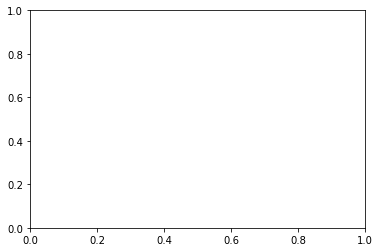

In [126]:
fig=plt.figure()
plt.hist(df_merge['unix_diff'],-1000000,1000000)